## Echantillonneur de Gibbs pour mélange gaussien


Considèrons un mélange gaussien d'ordre $K$ dans un contexte de statistique bayésienne.  

### Modèle
Notons les  paramètres d'un mélange gaussien par
$$\theta=(\underline \pi,\underline \mu,\underline\sigma^2)=\left(\pi_1,\dots,\pi_K,\mu_1,\dots,\mu_K,\sigma_1^2,\dots,\sigma_K^2\right),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$, $\mu_k\in\mathbb R$ et $\sigma_k^2>0$, $k=1,\dots,K$. 

On considère le modèle suivant:
\begin{align*}
\theta&\sim\pi(\theta)\\
z_i|\theta&\sim \sum_{k=1}^K\pi_k\delta_{\{k\}},\quad i=1,\dots,n\\
x_i|z_i,\theta&\sim \mathcal N(\mu_{z_i},\sigma^2_{z_i}),\quad i=1,\dots,n.
\end{align*}

### Loi a priori
On utilise la loi a priori de $\theta$ suivante :
$$\pi(\theta)=\pi(\underline\pi)\pi(\underline\mu|\underline\sigma^2)\pi(\underline\sigma^2)
=\pi(\underline\pi)\prod_{k=1}^K\pi(\mu_k|\sigma^2_k)\pi(\sigma_k^2)
$$
avec
$$\underline\pi \sim \mathcal D(\gamma_1,\dots,\gamma_K),\qquad
\mu_k|\sigma^2_k\sim\mathcal N\left(\alpha_k,\frac{\sigma_k^2}{\lambda_k}\right),\qquad
\sigma_k^2\sim \mathcal{IG}\left(\frac{\lambda_k}2,\frac{\beta_k}2\right),$$
où $\mathcal{IG}(\alpha,\beta)$ désigne la loi Gamma inverse de densité
$$f(x)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{-\alpha-1}\exp\left\{-\frac\beta x\right\},\qquad x>0.$$
L'ensemble des hyperparamètres est
$$
\psi =(\gamma_1,\dots,\gamma_K, \alpha_1,\dots,\alpha_K,\lambda_1,\dots,\lambda_K,\beta_1,\dots,\beta_K),
$$
où $\gamma_k>0$, $\alpha_k\in\mathbb R$, $\lambda_k>0$ et $\beta_k>0$.


### Simulation 
Pour simuler de la loi de Dirichlet on utilisera la fonction **rdirichlet(n,gamma)** du package **gtools** que l'on charge par la commande :

In [1]:
library(gtools)

Warning message:
"package 'gtools' was built under R version 3.6.3"

Pour simuler de  la loi Gamma inverse, on note la propriété suivante :
$$X\sim\mathcal{IG}(\alpha,\beta)\Longleftrightarrow \frac1X\sim\Gamma(\alpha,\beta).$$

# Question 1
- Ecrire une fonction **rthetaB** pour générer un paramètre $\theta$ selon la loi a priori $\pi(\theta)$ donnée ci-dessus. La fonction prend en argument une liste **psi** contenant les valeurs des hyperparamètres de la forme :
```R
psi <- list(gamma=c(1,1,1), alpha=c(1,1,1), lambda=c(2,2,2), beta=c(1,1,1))
```
- Jouer avec les valeurs des hyperparamètres. Comment choisir les paramètres pour avoir beaucoup/très peu de variabilité ? Comment choisir les $\gamma_k$ pour obtenir des proportions de groupe relativement équilibrées ? Comment choisir les autres paramètres pour 
que les variances $\sigma_k^2$ soient grandes/petites ? 
Et pour des moyennes $\mu_k$ relativement distinctes ? 

In [2]:
rthetaB <- function(psi){
    
    return(theta)
}

In [3]:
rthetaB <- function(psi){
  K <- length(psi$gamma)
  pi <- as.vector(rdirichlet(1,psi$gamma))
  sig2 <- 1/rgamma(K,psi$lambda/2, psi$beta/2)
  mu <- rnorm(K,psi$alpha,sig2/psi$lambda)
  theta <- list(pi=pi,mu=mu,sig=sqrt(sig2))
  return(theta)
}

In [4]:
# bcp de variabilité avec le psi suivant :
psi <- list(gamma=c(1,1,1)*.1, alpha=c(1,1,1), lambda=c(1,1,1)*.5, beta=c(1,1,1))
rthetaB(psi)

$pi
[1] 1.330237e-07 9.926904e-01 7.309486e-03

$mu
[1]   -0.6686031 -112.9619718   47.8343829

$sig
[1] 0.6605928 6.2795256 4.9169270

In [5]:
# très peu de variabilité avec le psi suivant :
psi <- list(gamma=c(3,2,1)*100, alpha=c(1,1,1), lambda=c(1,1,1)*100, beta=c(1,1,1))
rthetaB(psi)

$pi
[1] 0.5213516 0.3230388 0.1556097

$mu
[1] 0.9999324 0.9999377 1.0001786

$sig
[1] 0.09672591 0.10193099 0.10863563

In [6]:
# pour des pi équilibrés : tous les gamma_k identiques (et une grande valeur pour gamma_k)
psi <- list(gamma=c(1,1,1)*30, alpha=c(1,1,1), lambda=c(1,1,1)*100, beta=c(1,1,1))
rthetaB(psi)

$pi
[1] 0.2874572 0.3525383 0.3600045

$mu
[1] 1.0000402 1.0000513 0.9998749

$sig
[1] 0.1057822 0.1068217 0.1050690

In [7]:
psi <- list(gamma=c(1,1,1)*30, alpha=c(1,1,1), lambda=c(1,1,1), beta=c(1,1,1)*100)
rthetaB(psi)

$pi
[1] 0.3536187 0.3535037 0.2928777

$mu
[1] -42442.1824  -8335.6730    503.0468

$sig
[1] 163.69129  70.37150  15.83712

In [8]:
# 1: lambda grand et alpha distincts 
psi <- list(gamma=c(1,1,1)*100, alpha=c(1,10,20), lambda=c(1,1,1)*100, beta=c(1,1,1))
rthetaB(psi)
# 2: alpha identique, lambda petit et beta grand
psi <- list(gamma=c(1,1,1)*100, alpha=c(1,1,1), lambda=c(1,1,1)*100, beta=c(1,1,1)*100)
rthetaB(psi)

$pi
[1] 0.3629834 0.3318106 0.3052060

$mu
[1]  0.9999802  9.9998868 19.9999954

$sig
[1] 0.10028829 0.09964441 0.10458248

$pi
[1] 0.3322590 0.2960286 0.3717124

$mu
[1] 1.000805 1.002834 1.009773

$sig
[1] 0.9837408 0.9819524 0.9471046

# Question 2
- Ecrire une fonction  **rnormmixB** pour simuler un échantillon $\mathbf x=(x_1,\dots,x_n)$ selon le modèle décrit ci-dessus. La fonction renvoie la valeur du paramètre $\theta$ et l'échantillon $\mathbf x$ simulé. 
- Simuler un échantillon $\mathbf x$ sous le modèle et tracer son histogramme. Superposer la densité conditionnelle des données $\mathbf x$ sachant le paramètre $\theta$.

In [9]:
rnormmixB <- function(n,psi){

  return(list(obs=obs,theta=theta))
}

In [10]:
rnormmix <- function(n,theta){
  K <- length(theta$pi)
  etiqu <- sample(1:K,size=n,replace=TRUE,prob=theta$pi)
  obs <- rep(NA,n)
  i <- 1
  for (k in 1:K){
    n.group <- sum(etiqu==k)
    if(n.group>0){
      obs[i:(i+n.group-1)] <- rnorm(n.group,theta$mu[k],theta$sig[k])
      i <- i + n.group
    }
  }        
  return(obs)
}

rnormmixB <- function(n,psi){
  theta <- rthetaB(psi)
  obs <- rnormmix(n,theta)
  return(list(obs=obs,theta=theta))
}

$pi
[1] 0.1993565 0.1579648 0.6426787

$mu
[1]  0.04994195  4.96635831 15.10277851

$sig
[1] 0.4643355 0.6204468 0.8692164

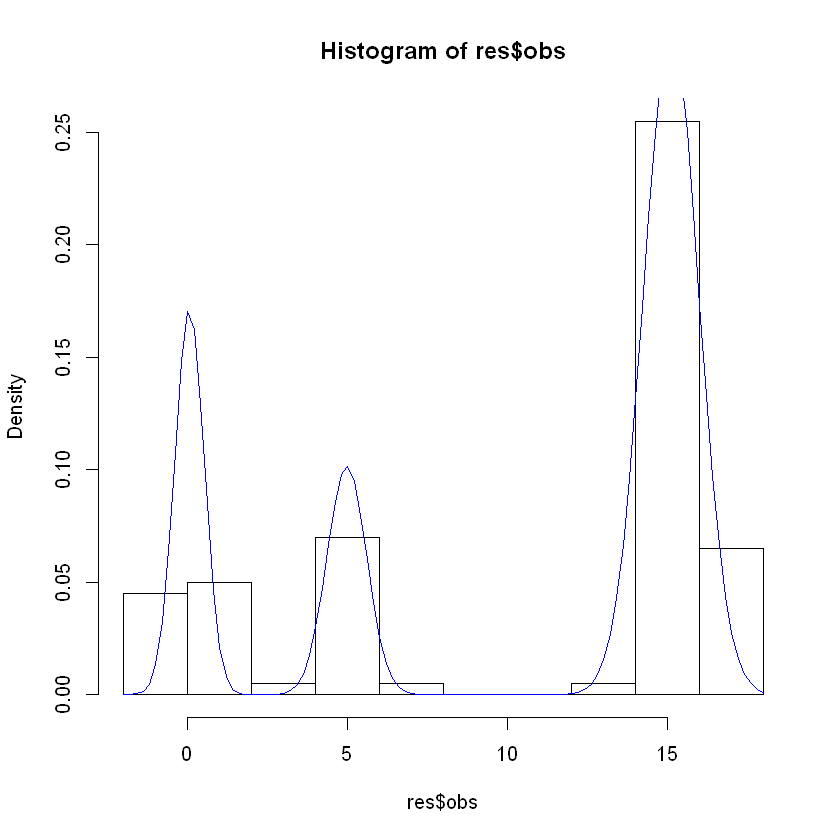

In [11]:
dnormmix <- function(x,theta){
  dens <- rep(0,length(x))
  K <- length(theta$pi)
  for (k in 1:K){
    dens <- dens + theta$pi[k]*dnorm(x,theta$mu[k],theta$sig[k])
  }                                         
  return(dens)
}

psi <- list(gamma=c(1,1,1)*3, alpha=c(0,5,15), lambda=c(1,1,1)*5, beta=c(1,1,1)*2)
res <- rnormmixB(100,psi)
res$theta
hist(res$obs,freq=F)
curve(dnormmix(x,res$theta),add=T,col='blue')

### Loi a posteriori
La loi a posterior de $\theta$ sachant $\mathbf x=(x_1,\dots,x_n)$ est donnée par
$$\pi(\theta|\mathbf x)\propto 
\prod_{i=1}^n\left(\sum_{k=1}^K\pi_kf_{\mathcal N(\mu_k,\sigma_k^2)}(x_i) \right)\times\pi(\theta)
$$
En en déduit que la fonction de  log-aposteriori est donnée par
$$\log \pi(\theta|\mathbf x)
= \sum_{i=1}^n\log\left(\sum_{k=1}^K\pi_kf_{\mathcal N(\mu_k,\sigma_k^2)}(x_i) \right)+\log(\pi(\underline\pi)) +\sum_{k=1}^K\log(\pi(\mu_k|\sigma^2_k))+ \sum_{k=1}^K\log(\pi(\sigma_k^2))+\text{cst},
$$
où  $\text{cst}$ est une constante que l'on ne précisera pas.

Remarquons que pour $X\sim\mathcal{IG}(\alpha,\beta)$ et $Y\sim\Gamma(\alpha,\beta)$, les densités associées vérifient
$$f_X(s) = \frac1{s^2}f_Y\left(\frac1s\right),\qquad s>0.$$

# Question 3
- Ecrire une fonction **logaposteriori** afin de calculer la fonction de log-aposteriori $\log \pi(\theta|\mathbf x)$ en $\theta$ (à une constante près). Elle prend en argument  la valeur de $\theta$ où on veut évaluer $\log \pi(\theta|\mathbf x)$, l'échantillon $\mathbf x$ et les hyperparamètres $\psi$. (Attention : pour éviter des termes qui valent $-\infty$ (en prenant le log de 0), remplacer les $\log 0$ par $0$.)
- Pour un mélange à **deux** composants dont les hyperparamètres sont donnés par
```R
psi <- list(gamma=c(3,3), alpha=c(0,4), lambda=c(4,4), beta=c(2,2))
```
visualiser la  fonction de log-aposteriori $\log \pi(\theta|\mathbf x)$ pour un échantillon $\mathbf x$ simulé en utilisant **image**. Les axes de la figure sont les moyennes de groupe $\mu_1$ et $\mu_2$. Essayer différents tailles d'échantillon $n$ (p.ex. $n=20, 200, 2000$). Interpréter.

In [12]:
logaposteriori <- function(theta,x,psi){
    
    return(l)
}

In [13]:
logaposteriori <- function(theta,x,psi){
  vec <- log(dnormmix(x,theta))  
  vec[vec==-Inf] <- 0
  l <- sum(vec)
  l <- l + log(ddirichlet(theta$pi,psi$gamma))
  vec <- log(dnorm(theta$mu,psi$alpha,theta$sig/sqrt(psi$lambda)))
  vec[vec==-Inf] <- 0
  l <- l + sum(vec)
  vec <- log(dgamma(1/(theta$sig^2), (psi$lambda-1)/2,rate=psi$beta/2)/(theta$sig^4))
  vec[vec==-Inf] <- 0
  l <- l + sum(vec)
  return(l)
}

In [14]:
logaposteriori(res$theta,res$obs,psi)

[1] -192.9848

$pi
[1] 0.6165729 0.3834271

$mu
[1] -0.009694909  4.093184818

$sig
[1] 0.4250600 0.7070214

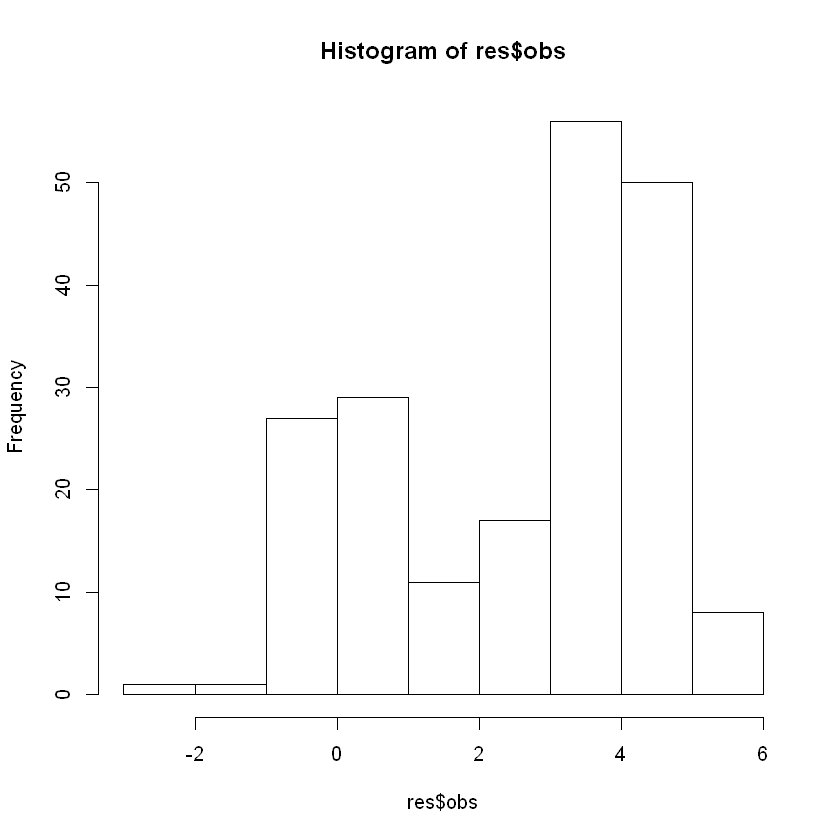

In [15]:
n <- 200
psi <- list(gamma=c(3,3), alpha=c(0,4), lambda=c(4,4), beta=c(2,2))
set.seed(1711)
rthetaB(psi)
res <- rnormmixB(n,psi)
hist(res$obs)

mu.grille <- seq(-1.5,7,by=.1) 
G <- length(mu.grille)
L <- matrix(NA,nrow=G,ncol=G)
param <- res$theta
for (k in 1:G)
  for (l in 1:G){
    param$mu <- c(mu.grille[k],mu.grille[l]) 
    L[k,l] <- logaposteriori(param,res$obs,psi)     
  }  

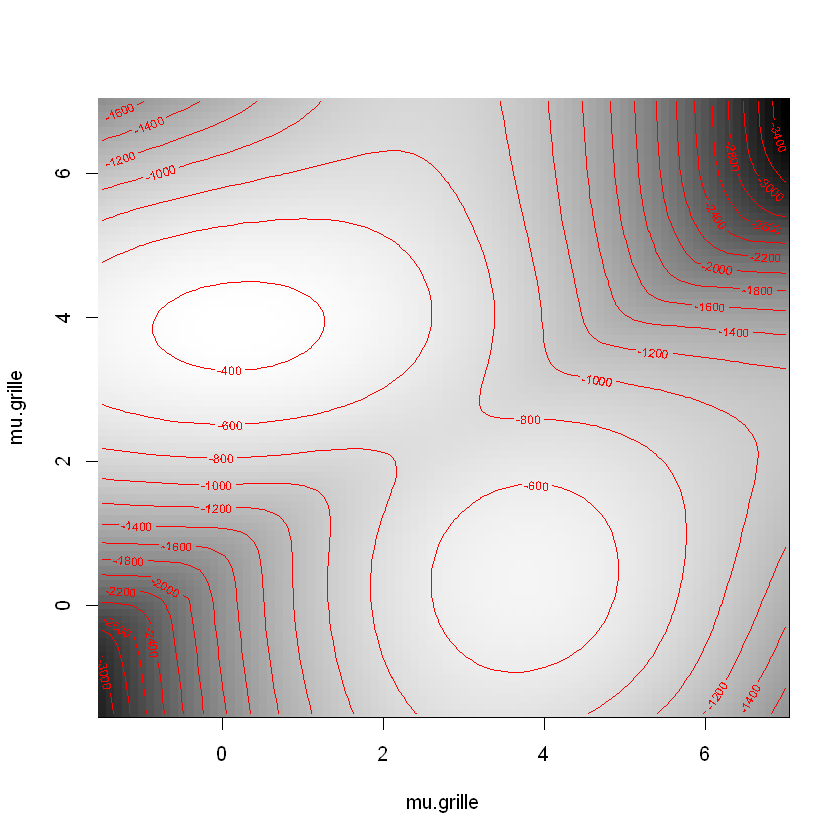

In [16]:
image(mu.grille,mu.grille,L,col=grey(0:255/255))
contour(mu.grille,mu.grille,L,add=T,nlevels=20,col='red') 


### Lois conditionnelles pour le Gibbs sampler
Le Gibbs sampler exploite la structure des variables latentes $\mathbf z=(z_1,\dots,z_n)$. Plus précisément, l'algorithme consiste à simuler succéssivement des lois conditionnelles  suivantes :
\begin{align*}
\pi(\mathbf z|\mathbf x,\theta)&=\prod_{i=1}^n\pi( z_i|x_i,\theta)\qquad\text{ avec }\qquad\
\pi( z_i|x_i,\theta)\propto \pi_{z_i}f_{\mathcal N(\mu_{z_i},\sigma_{z_i}^2)}(x_i) \\
\pi(\theta|\mathbf z,\mathbf x)&\propto  \pi(\underline \pi|\mathbf z,\mathbf x) \times\pi(\underline\mu,\underline\sigma^2|\mathbf z,\mathbf x)\qquad\text{ avec }\\
&\quad\underline \pi|(\mathbf z,\mathbf x)\sim\mathcal D(\gamma_1+n_1,\dots,\gamma_K+n_k)\qquad \text{où}\qquad n_k=\#\{i:z_i=k\}\\
&\quad\pi(\underline\mu,\underline\sigma^2|\mathbf z,\mathbf x)
\propto\prod_{k=1}^K\pi(\mu_k,\sigma^2_k|\mathbf z,\mathbf x)
=\prod_{k=1}^K\left( \pi(\mu_k|\sigma_k)\pi(\sigma_k)\prod_{i:z_i=k}f_{\mathcal N(\mu_k,\sigma_k^2)}(x_i)\right)
\end{align*}
Plus précisément, on peut montrer que
\begin{align*}
\mu_k|\sigma_k,\mathbf z,\mathbf x &\sim\mathcal N\left(\frac{\sum_{i:z_i=k}x_i+\alpha_k\lambda_k}{n_k+\lambda_k},\frac{\sigma_k^2}{n_k+\lambda_k}\right)\\
\sigma_k^2|\mathbf z,\mathbf x &\sim\mathcal{IG}\left(\frac{n_k+\lambda_k}2,\frac12\left(\sum_{i:z_i=k}x_i^2+\lambda_k\alpha_k^2+\beta_k-\frac{(\sum_{i:z_i=k}x_i+\alpha_k\lambda_k)^2}{n_k+\lambda_k}
\right)
\right) 
\end{align*}

# Question 4
- Ecrire des fonctions **rz** et **rtheta** pour simuler des lois conditionnelles $\pi(\mathbf z|\mathbf x,\theta)$ et $\pi(\theta|\mathbf z,\mathbf x)$.
- Ecrire une fonction **gibbs** pour implémenter l'échantillonneur de Gibbs pour le mélange gaussien. 
La fonction prend en argument les observations **obs**, une valeur initiale **theta.init** pour $\theta$, les hyperparamètres **psi**, le nombre d'itérations souhaité $R$, et la longueur $B$ du *burn-in time*. 
La fonction   simule  $R+B$ fois de $\pi(\mathbf z|\mathbf x,\theta)$ et de $\pi(\theta|\mathbf z,\mathbf x)$, et elle renvoie  les $R$ dernières simulations de $\theta$ et de $\mathbf z$. 

In [17]:
rz <- function(theta,obs){

    return(z)
}

In [18]:
rz <- function(theta,obs){
  n <- length(obs)
  K <- length(theta$pi)
  P <- matrix(NA,n,K)
  for (k in 1:K)
    P[,k] <- theta$pi[k]*dnorm(obs,theta$mu[k],theta$sig[k])    
  z <- apply(P,1,function(row)if(sum(row)>0) sample(1:K,size=1,prob=row) else sample(1:K,size=1,prob=rep(1,K))) 
  return(z)
}

In [19]:
z <- rz(res$theta,res$obs)
z

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [20]:
rtheta <- function(z,obs,psi){
  
  return(theta)  
}

In [21]:
rtheta <- function(z,obs,psi){
  K <- length(psi$gamma)
  count_group <- sapply(1:K,function(k)sum(z==k))
  sum_group <- sapply(1:K,function(k)sum(obs[z==k]))
  sum2_group <- sapply(1:K,function(k)sum((obs[z==k])^2))
  
  pi <- as.vector(rdirichlet(1,psi$gamma+count_group))
  
  a <- (count_group+psi$lambda)/2
  b <- (sum2_group+psi$lambda*psi$alpha^2+psi$beta-(sum_group+psi$alpha*psi$lambda)^2/(count_group+psi$lambda))/2
  if (sum(b>0)==K){
    sig2 <- 1/rgamma(K,a,b)
  }else{ 
    sig2 <- 1/rgamma(K,(psi$lambda-1)/2, psi$beta/2)
  }
  m <- (sum_group+psi$lambda*psi$alpha)/(count_group+psi$lambda)
  s2 <- sig2/(count_group+psi$lambda)
  mu <- rnorm(K,m,sqrt(s2))
  
  theta <- list(pi=pi, mu=mu, sig=sqrt(sig2))
  return(theta)  
}

In [22]:
rtheta(z,res$obs,psi)

$pi
[1] 0.3192907 0.6807093

$mu
[1] 0.09500539 3.79173275

$sig
[1] 0.7013352 0.7021169

In [23]:
gibbs <- function(obs,theta.init,psi,R=1000,B=500){
 
  return(list(theta=theta,z=z))
}

In [24]:
gibbs <- function(obs,theta.init,psi,R=1000,B=500){
  theta <- vector("list",B+R+1)
  theta[[1]] <- theta.init
  z <- vector("list",B+R)
  for (r in 1:(R+B)){
    z[[r]] <- rz(theta[[r]],obs)
    theta[[r+1]] <- rtheta(z[[r]],obs,psi)
  }
  return(list(theta=theta[(B+2):(R+B+1)],z=z[(B+1):(R+B)]))
}

## Estimateurs bayésiens et convergence de l'algorithme

Le but du Gibbs sampler est de créer un échantillon de la loi aposteriori $\pi(\theta|\underline x)$. Ensuite, cet échantillon de valeurs simulées $\theta^{(t)},t=1,\dots,R$ est utilisé pour évaluer des estimateurs bayésiens comme la moyenne aposteriori. Ainsi, la valeur de $\mu_1$ est estimé par 
$$\hat\mu_1=\frac1R\sum_{t=1}^R\mu_1^{(t)}.$$ 

Un outil simple pour apprécier la convergence de l'algorithme consiste à surveiller l'évolution de la moyenne des valeurs simulées. Autrement dit, on considère les tracés du type 
$$r\mapsto\frac1r\sum_{t=1}^r\mu_1^{(t)}\qquad\text{ pour }r=1,\dots,R.$$

Le Gibbs sampler fournit également un échantillon simulé des étiquette $z_i^{(t)}$. On peut étudier pour chaque observation $x_i$ la proportion avec laquelle le Gibbs sampler l'affecte au premier (deuxième,...) groupe, c'est-à-dire la proportion 
$$p_{i,k}=\#\{t:z_i^{(t)}=k\}/R\qquad\text{ pour }k=1,\dots,K,\quad i=1,\dots,n.$$
Dans le cas  d'un mélange gaussien, on considère que l'algorithme a convergé si les tracés des estimateurs du type $r\mapsto\frac1r\sum_{t=1}^r\mu_1^{(t)}$ se sont stabilisés **et** si l'affection des observations $x_i$ a un groupe est stable.


# Question 5
- Appliquer l'échantillonneur de Gibbs aux données simulées de taille $n=200$ du mélange à deux composants considéré à la Question 3 en initialisant par les vraies valeurs des paramètrs.
- Représenter la loi a posteriori en traçant les histogrammes des différentes variables ($\mu_k,\sigma_k^2,\pi_k,k=1,2$).  
- Ajouter les points simulés  $(\mu_1^{(t)},\mu_2^{(t)}), t=1,\dots,R$ au graphique de la fonction log-aposteriori. 
- Ecrire une fonction **tracer.estim** pour représenter graphiquement les tracés du type $r\mapsto\frac1r\sum_{t=1}^r\mu_1^{(t)}$ pour $r=1,\dots,R$. De plus, la fonction renvoie les estimateurs bayésiens finaux (c'est-à-dire $\hat\mu_1$, etc.). Appliquer la fonction à vos données.
-  Ecrire une fonction **class.zi** afin de calculer les proportions $p_{i,k}=\#\{t:z_i^{(t)}=k\}/R$ pour $k=1,\dots,K$ et $i=1,\dots,n$. Tracer le nuage des points $(x_i,p_i), i=1,\dots,n$.

In [25]:
n <- 2000
psi <- list(gamma=c(3,3), alpha=c(0,4), lambda=c(4,4), beta=c(2,2))
set.seed(1711)
rthetaB(psi)
res <- rnormmixB(n,psi)

sim <- gibbs(res$obs,res$theta,psi)

$pi
[1] 0.6165729 0.3834271

$mu
[1] -0.009694909  4.093184818

$sig
[1] 0.4250600 0.7070214

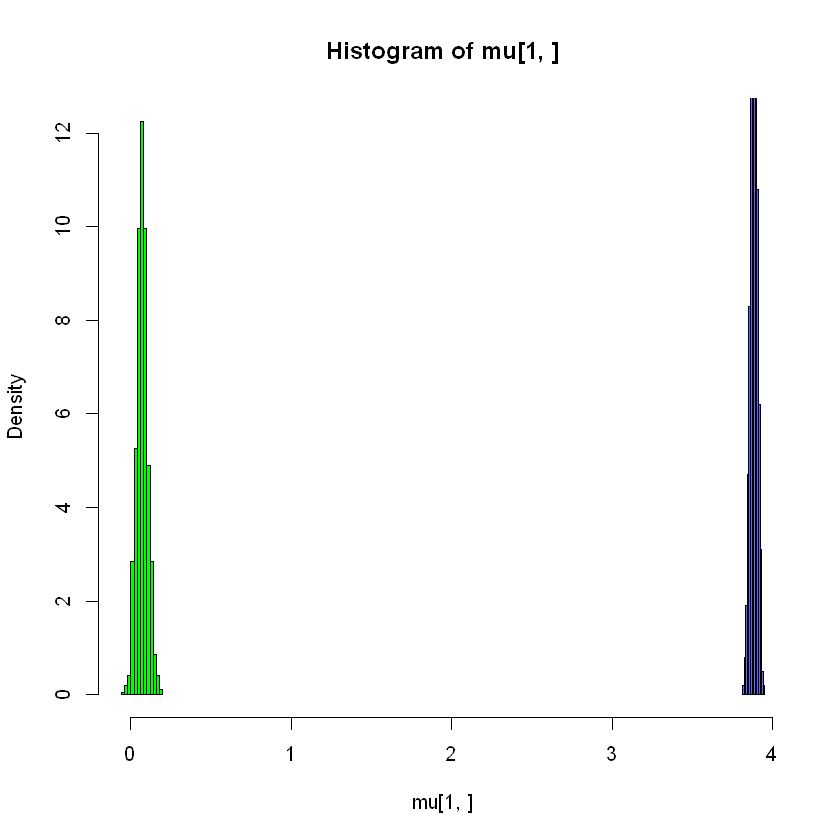

In [26]:
mu <- sapply(sim$theta,function(theta) theta$mu  )
hist(mu[1,],freq=F,col='green',xlim=c(min(mu),max(mu)))
hist(mu[2,],freq=F,col=rgb(0,0,1,alpha=0.6),add=TRUE)

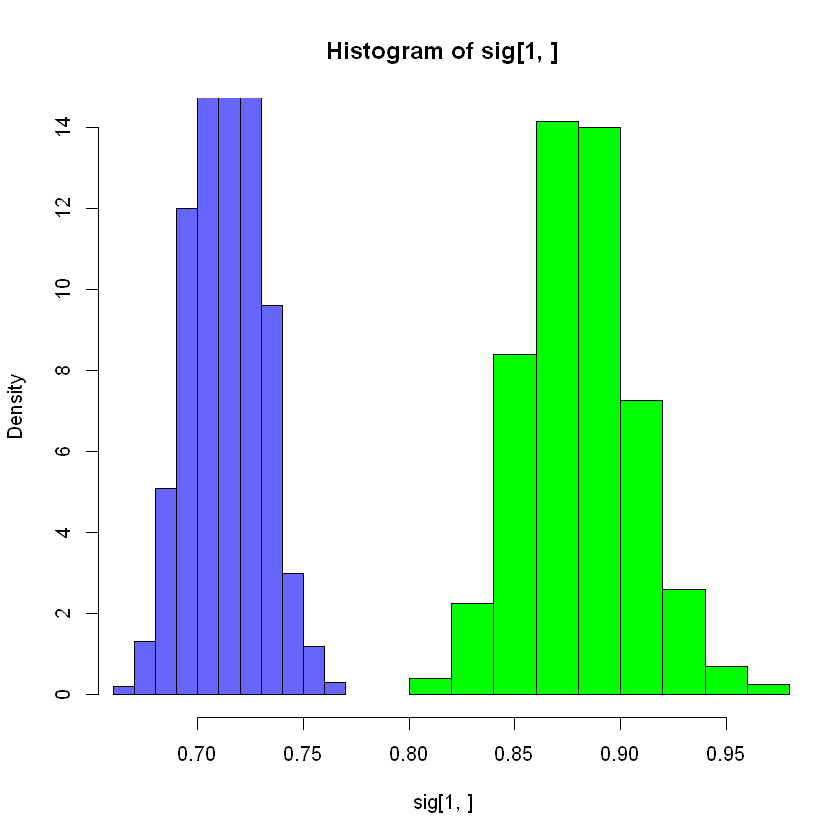

In [27]:
sig <- sapply(sim$theta,function(theta) theta$sig  )
hist(sig[1,],freq=F,col='green',xlim=c(min(sig),max(sig)))
hist(sig[2,],freq=F,col=rgb(0,0,1,alpha=0.6),add=TRUE)

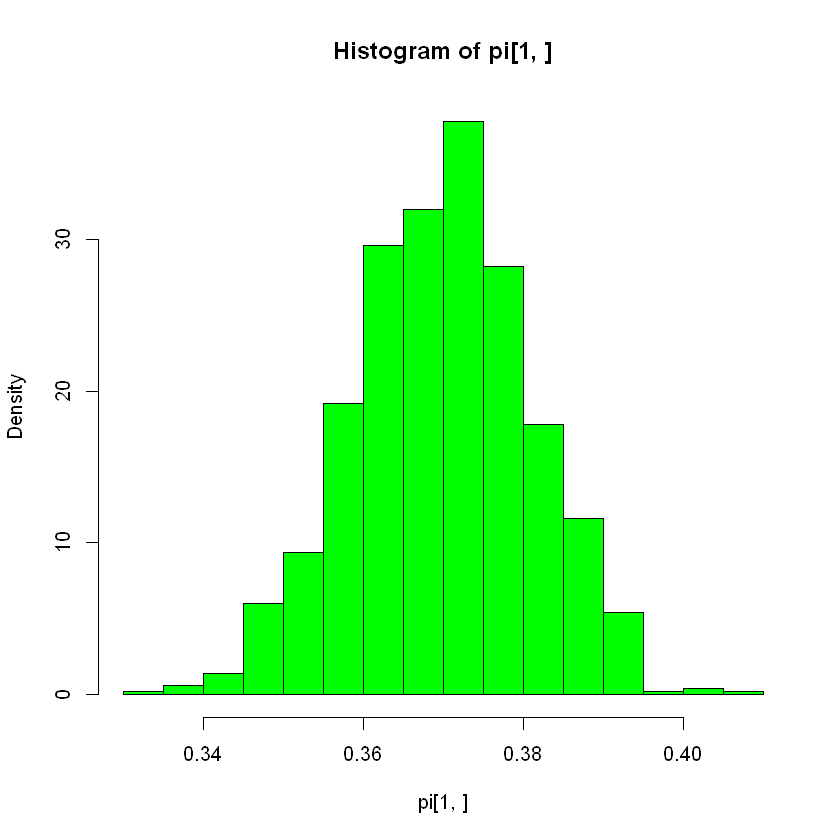

In [28]:
pi <- sapply(sim$theta,function(theta) theta$pi)
hist(pi[1,],freq=F,col='green')

In [29]:
mu.grille <- seq(-1.5,7,by=.1) 
G <- length(mu.grille)
L <- matrix(NA,nrow=G,ncol=G)
param <- res$theta
for (k in 1:G)
  for (l in 1:G){
    param$mu <- c(mu.grille[k],mu.grille[l]) 
    L[k,l] <- logaposteriori(param,res$obs,psi)     
  }  

In [30]:
sim.mu <- sapply(sim$theta,function(elem) elem$mu) 

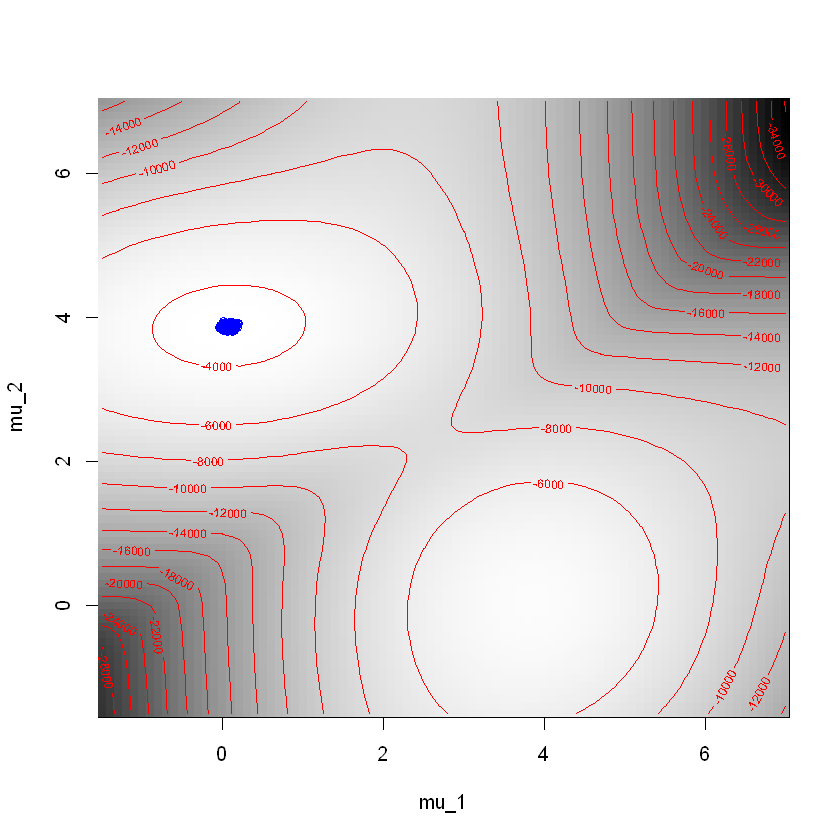

In [31]:
image(mu.grille,mu.grille,L,col=grey(0:255/255),xlab='mu_1',ylab='mu_2')
contour(mu.grille,mu.grille,L,add=T,nlevels=20,col='red') 
points(sim.mu[1,],sim.mu[2,],col='blue')

In [32]:
tracer.estim <- function(sim){
  
    return(estim)      
}

In [33]:
tracer.estim <- function(sim){
   sim.pi <- sapply(sim$theta,function(elem) elem$pi) 
   sim.mu <- sapply(sim$theta,function(elem) elem$mu) 
   sim.sig <- sapply(sim$theta,function(elem) elem$sig)     
   K <- nrow(sim.pi)
   R <- ncol(sim.pi)    
   par(mfrow=c(3,1))          
   plot(1:R,cumsum(sim.pi[1,])/(1:R),type='l',col=1,ylim=c(0,1),ylab='pi',xlab="nb d'itérations")    
   for(k in 2:K){
       lines(1:R,cumsum(sim.pi[k,])/(1:R),col=k)            
   }
   estim.mu <- apply(sim.mu,1,function(col)cumsum(col)/(1:R))    
   ymin <- min(estim.mu)
   ymax <- max(estim.mu)    
   plot(1:R,estim.mu[,1],type='l',col=1,ylim=c(ymin,ymax),ylab='mu',xlab="nb d'itérations")    
   for(k in 2:K){
       lines(1:R,estim.mu[,k],col=k)            
   }
   estim.sig <- apply(sim.sig,1,function(col)cumsum(col)/(1:R))    
   ymin <- min(estim.sig)
   ymax <- max(estim.sig)    
   plot(1:R,estim.sig[,1],type='l',col=1,ylim=c(ymin,ymax),ylab='sigma',xlab="nb d'itérations")    
   for(k in 2:K){
       lines(1:R,estim.sig[,k],col=k)            
   }
   estim=list(pi=rowMeans(sim.pi), mu=rowMeans(sim.mu), sig=rowMeans(sim.sig))
   return(estim)      
}

$pi
[1] 0.3698642 0.6301358

$mu
[1] 0.07095496 3.88166781

$sig
[1] 0.8805249 0.7135714

$pi
[1] 0.3724916 0.6275084

$mu
[1] 0.07471692 3.91131067

$sig
[1] 0.8676042 0.6843370

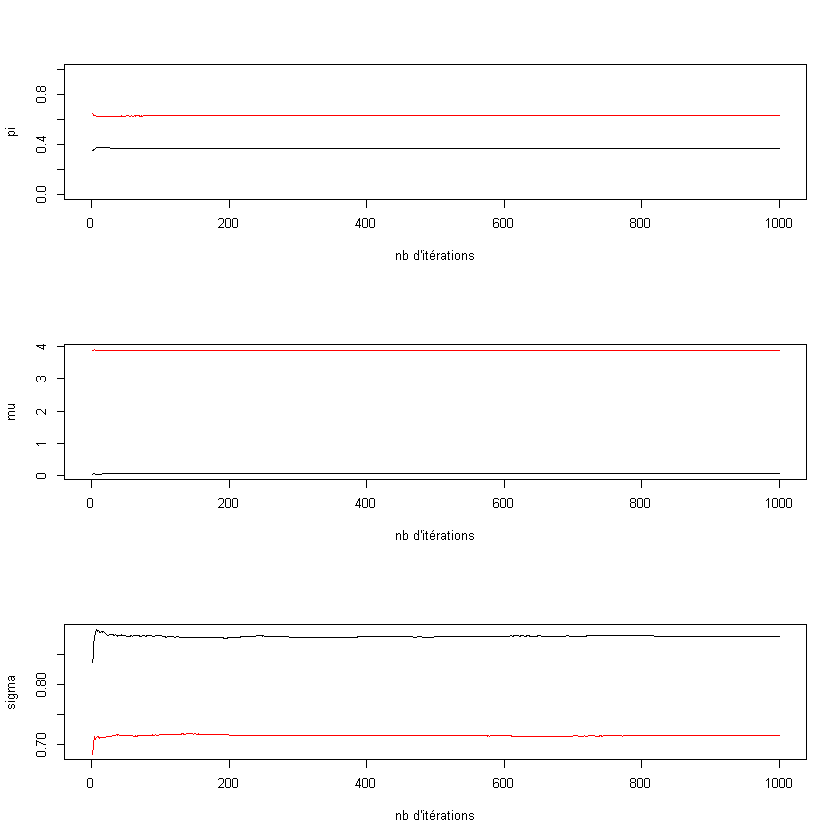

In [34]:
tracer.estim(sim)
res$theta

In [35]:
class.zi <- function(sim){
    
    return(class)
}

In [36]:
class.zi <- function(sim){
    K <- length(sim$theta[[1]]$pi)
    sim.z <- sapply(sim$z,function(elem)elem) # n x R
    class <- sapply(1:K,function(k) rowMeans(sim.z==k))
    return(class)
}

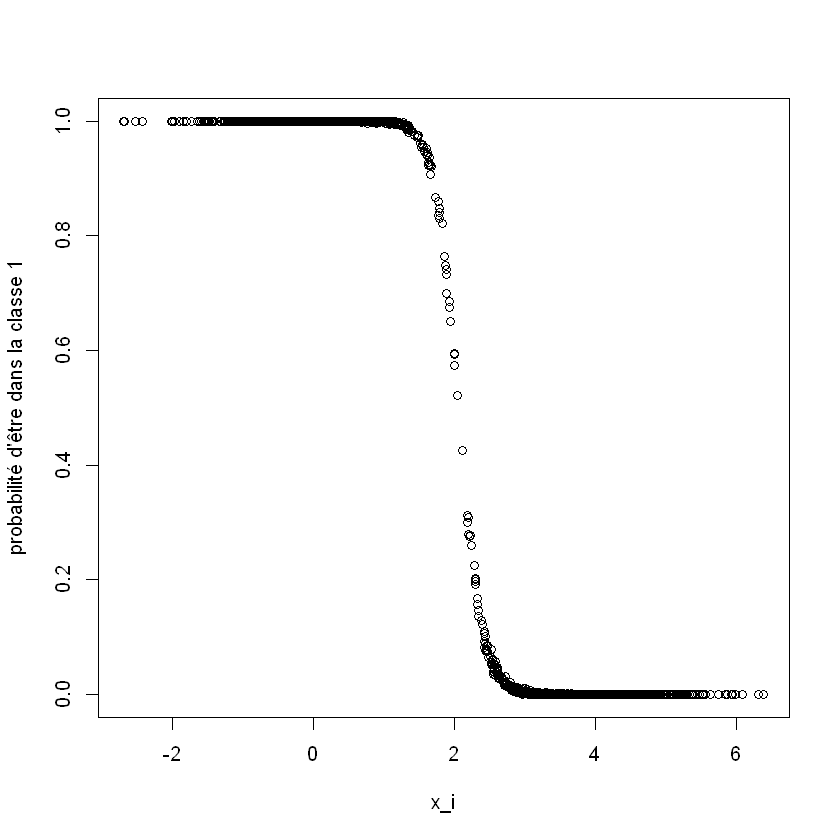

In [37]:
class <- class.zi(sim)
plot(res$obs,class[,1],xlab='x_i',ylab="probabilité d'être dans la classe 1")

# Question 6
- Pour les mêmes données, appliquer l'échantillonneur de Gibbs  en intialisant les vraies valeurs des paramètres mais **en permutant les composants**. Retracer le graphique de la log-aposterior avec les points simulés. Comparer à la question précédente.
- Essayer d'autres points initaux et regarder si on arrive à explorer les deux modes.

In [38]:
theta.permute <- res$theta
theta.permute$pi <- theta.permute$pi[2:1]
theta.permute$mu <- theta.permute$mu[2:1]
theta.permute$sig <- theta.permute$sig[2:1]

sim <- gibbs(res$obs,theta.permute,psi)

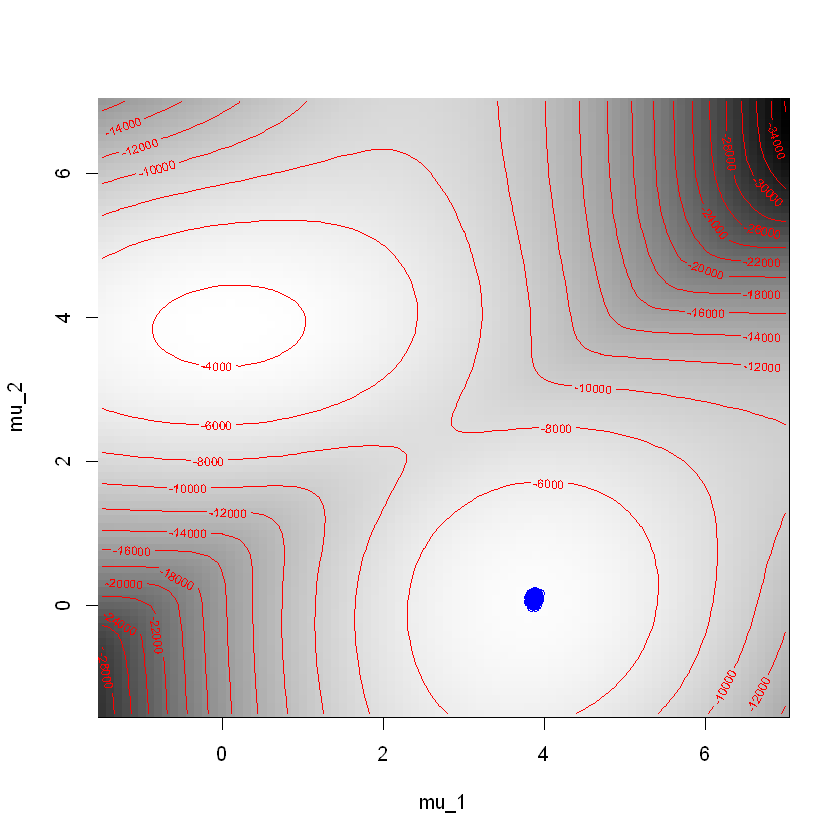

In [39]:
sim.mu <- sapply(sim$theta,function(elem) elem$mu) 
image(mu.grille,mu.grille,L,col=grey(0:255/255),xlab='mu_1',ylab='mu_2')
contour(mu.grille,mu.grille,L,add=T,nlevels=20,col='red') 
points(sim.mu[1,],sim.mu[2,],col='blue')

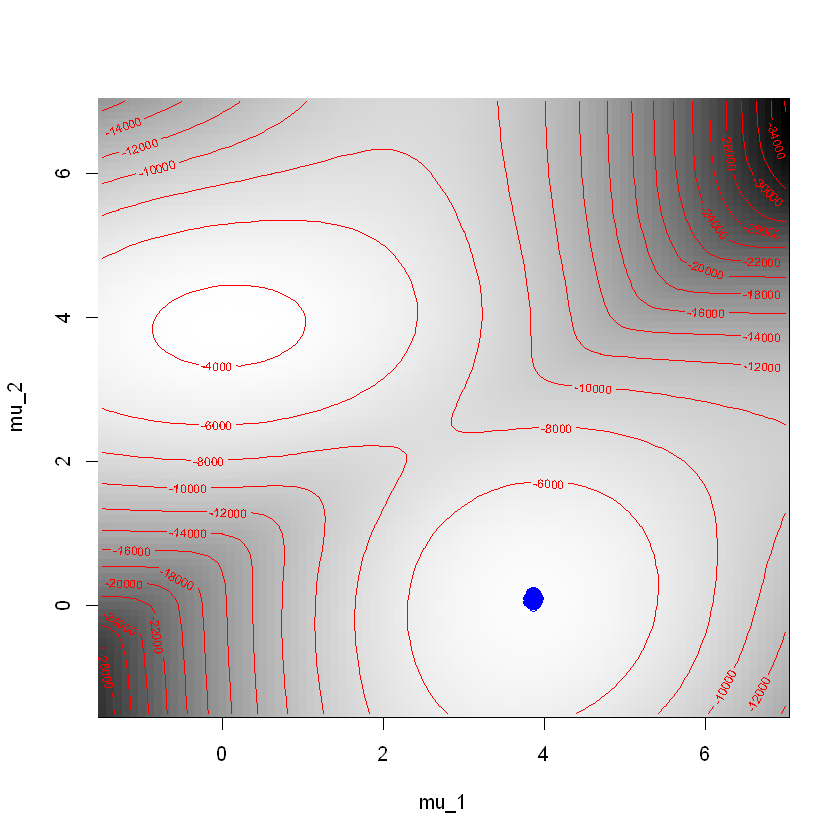

In [40]:
theta <- res$theta
theta$mu <- c(3,2)  # entre les deux modes
sim <- gibbs(res$obs,theta,psi)
image(mu.grille,mu.grille,L,col=grey(0:255/255),xlab='mu_1',ylab='mu_2')
contour(mu.grille,mu.grille,L,add=T,nlevels=20,col='red') 
sim.mu <- sapply(sim$theta,function(elem) elem$mu) 
points(sim.mu[1,],sim.mu[2,],col='blue')   

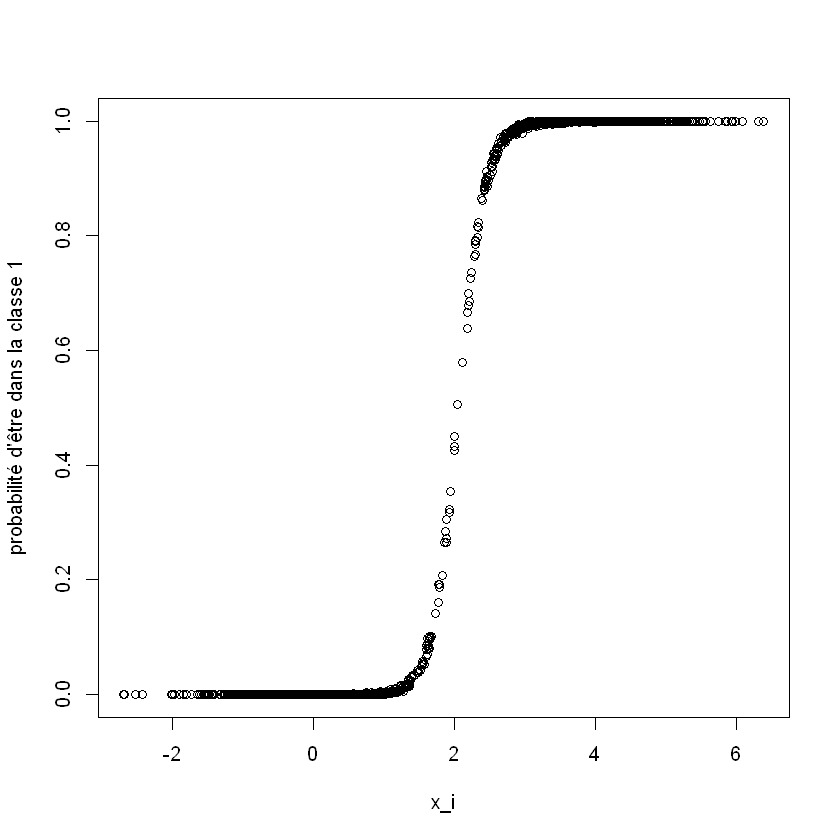

In [41]:
class <- class.zi(sim)
plot(res$obs,class[,1],xlab='x_i',ylab="probabilité d'être dans la classe 1")

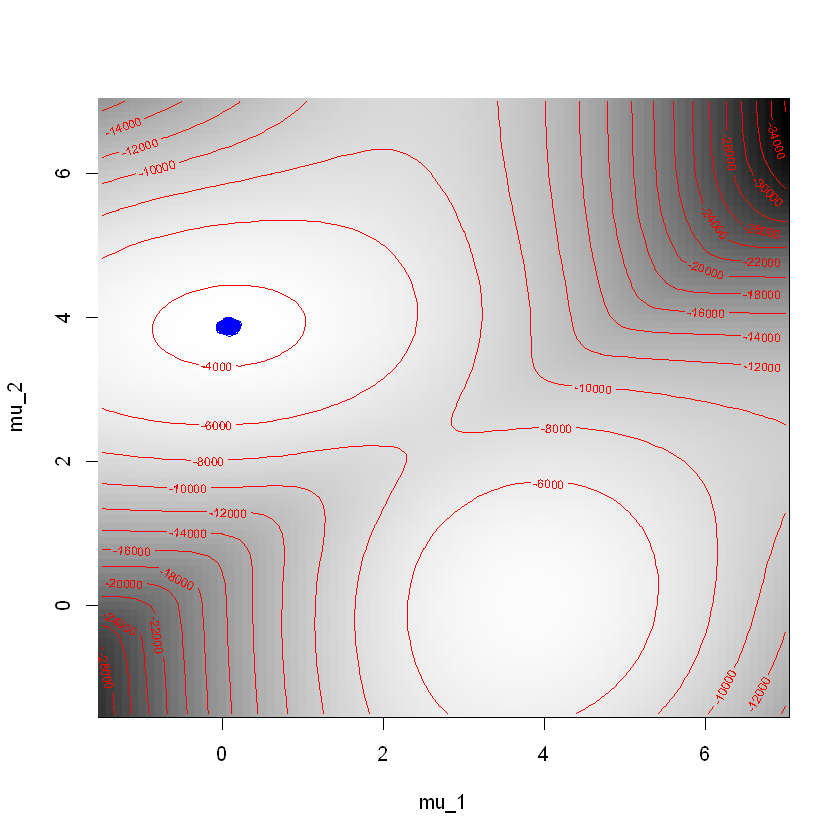

In [42]:
theta <- res$theta
theta$mu <- c(6,5) ##  logaposteriori très basse
sim <- gibbs(res$obs,theta,psi)
image(mu.grille,mu.grille,L,col=grey(0:255/255),xlab='mu_1',ylab='mu_2')
contour(mu.grille,mu.grille,L,add=T,nlevels=20,col='red') 
sim.mu <- sapply(sim$theta,function(elem) elem$mu) 
points(sim.mu[1,],sim.mu[2,],col='blue')

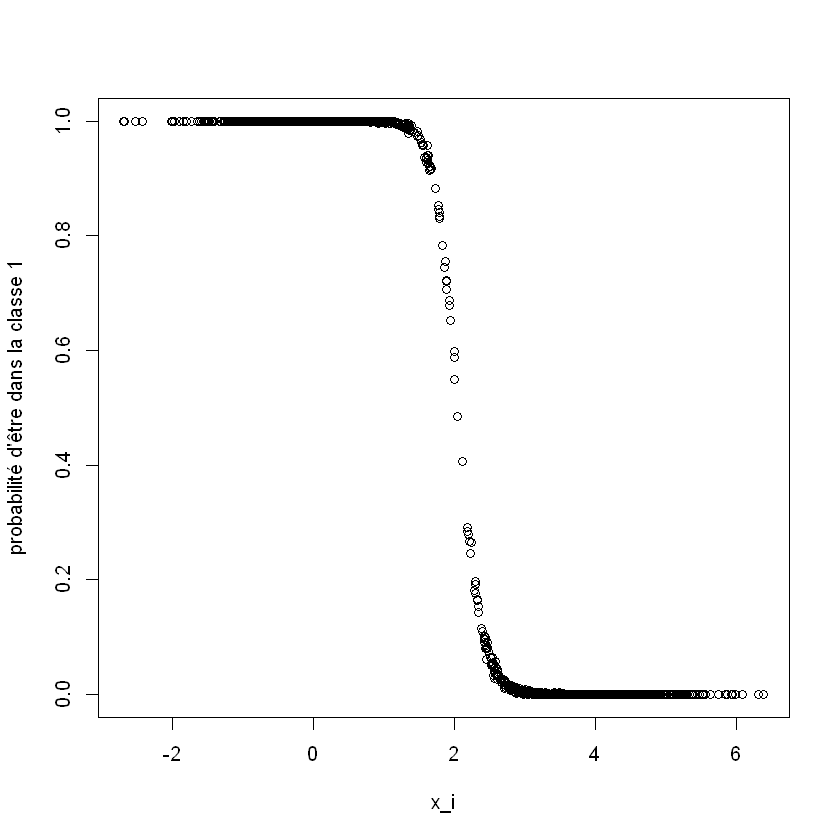

In [43]:
class <- class.zi(sim)
plot(res$obs,class[,1],xlab='x_i',ylab="probabilité d'être dans la classe 1")

Quelque soit le point initial, l'algorithme n'expolore qu'un seul mode. Il n'arrive pas à "traverser" une vallée pour passer à l'autre mode (même si on augmente considérablement le nombre d'itérations.)

### Application aux données réelles

Pour appliquer l'échantillonneur de Gibbs, il faut choisir des valeurs des hyperparamètres. Nous allons faire le choix suivant pour un mélange de deux gaussiennes :
- $\gamma_k=\frac12, k=1,2$,
- $\alpha_1=\min\{x_1,\dots,x_n\}, \alpha_2=\min\{x_1,\dots,x_n\}$,
- $\lambda_k=2, k=1,2$,
- $\beta_k=s_x^2=\frac1n\sum_{i=1}^n(x_i-\bar x)^2, k=1,2$

Et pour initialiser $\theta$, on utilisera :
- $\pi_k=\frac12, k=1,2$
- $\mu_1=\min\{x_1,\dots,x_n\}, \mu_2=\min\{x_1,\dots,x_n\}$,
- $\sigma_k=s_x, k=1,2$.


# Question 7
Appliquer le Gibbs sampler aux données **ailes** et **chlor** disponible dans le fichier **donneesmelange.RData**. Contrôler la convergence de l'algorithme à l'aide des tracés des estimateurs bayésiens en fonction du nombre d'itérations. Représenter graphiquement les probabilités $p_{i,1}$ des observations d'appartenir au premier groupe du mélange. Comparer les résultats à ceux obtenus par l'algorithme EM.

In [44]:
load('donneesmelange.RData')

In [45]:
psi.ailes <- list(gamma=c(1/2,1/2), alpha= c(min(ailes),max(ailes)), lambda=c(2,2), beta=c(1,1)*var(ailes))
psi.ailes

theta.ailes <- list(pi=c(.5,.5),mu = c(min(ailes),max(ailes)),sig=sd(ailes)*c(1,1))
theta.ailes

$gamma
[1] 0.5 0.5

$alpha
[1] 82 98

$lambda
[1] 2 2

$beta
[1] 11.95509 11.95509

$pi
[1] 0.5 0.5

$mu
[1] 82 98

$sig
[1] 3.457613 3.457613

In [46]:
gibbs.ailes <- gibbs(ailes,theta.ailes,psi.ailes,R=1000)

$pi
[1] 0.4784899 0.5215101

$mu
[1] 86.07805 92.33576

$sig
[1] 1.561153 1.744661

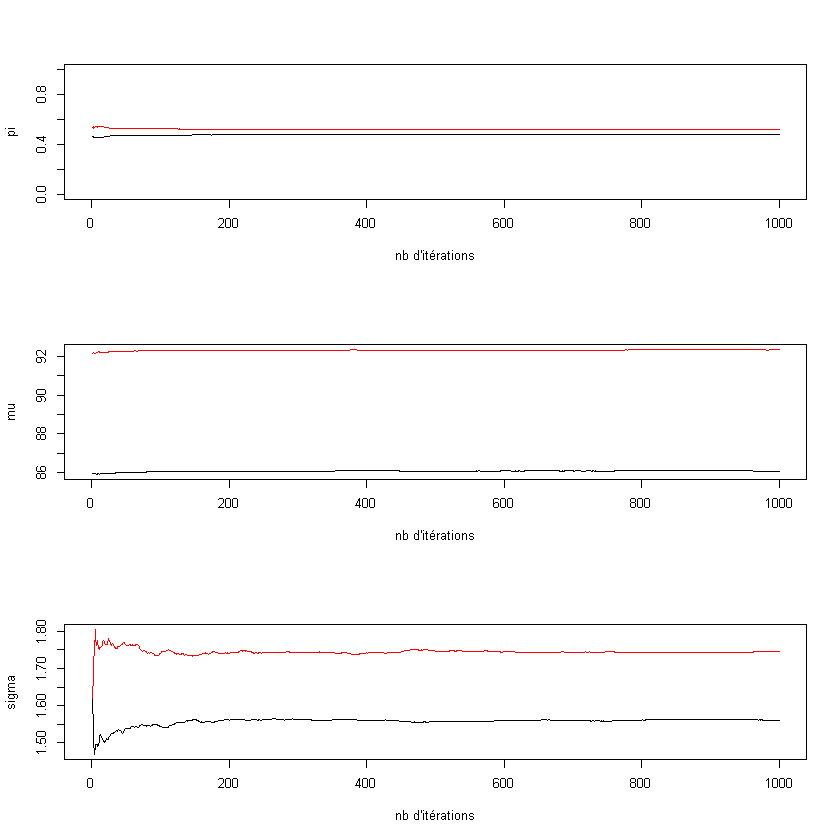

In [47]:
tracer.estim(gibbs.ailes)

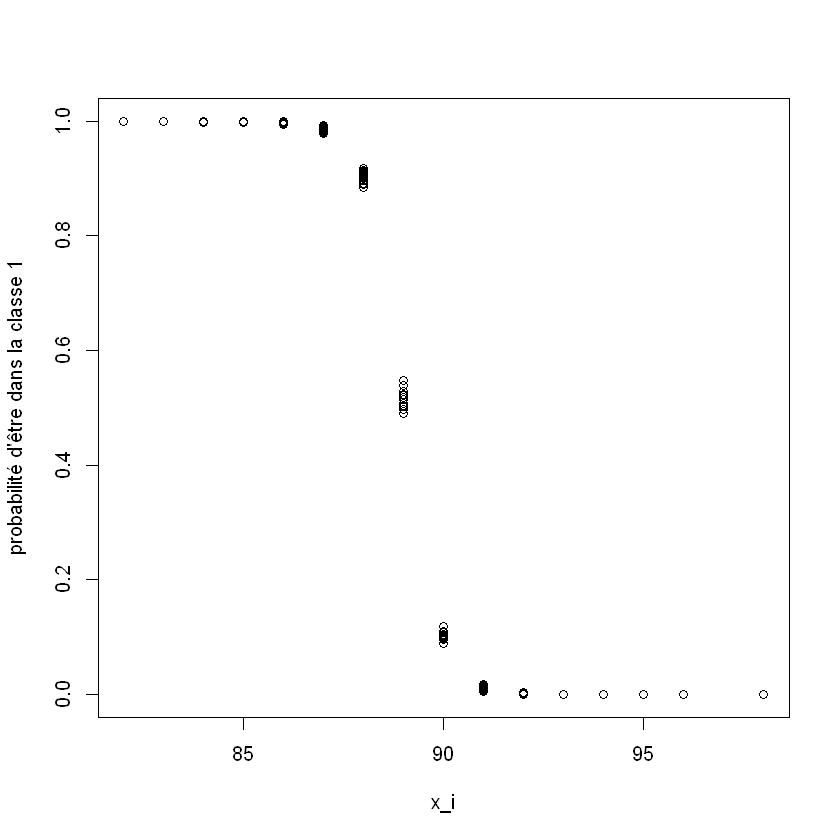

In [48]:
class <- class.zi(gibbs.ailes)
plot(ailes,class[,1],xlab='x_i',ylab="probabilité d'être dans la classe 1")

In [49]:
psi.chlor <- list(gamma=c(1/2,1/2), alpha= c(min(chlor),max(chlor)), lambda=c(2,2), beta=c(1,1)*var(chlor))
psi.chlor

theta.chlor <- list(pi=c(.5,.5),mu = c(min(chlor),max(chlor)),sig=sd(chlor)*c(1,1))
theta.chlor

$gamma
[1] 0.5 0.5

$alpha
[1]  88 115

$lambda
[1] 2 2

$beta
[1] 13.66885 13.66885

$pi
[1] 0.5 0.5

$mu
[1]  88 115

$sig
[1] 3.697141 3.697141

In [50]:
gibbs.chlor <- gibbs(chlor,theta.chlor,psi.chlor,R=5000)

$pi
[1] 0.97269085 0.02730915

$mu
[1]  99.90545 111.37595

$sig
[1] 3.587364 3.991334

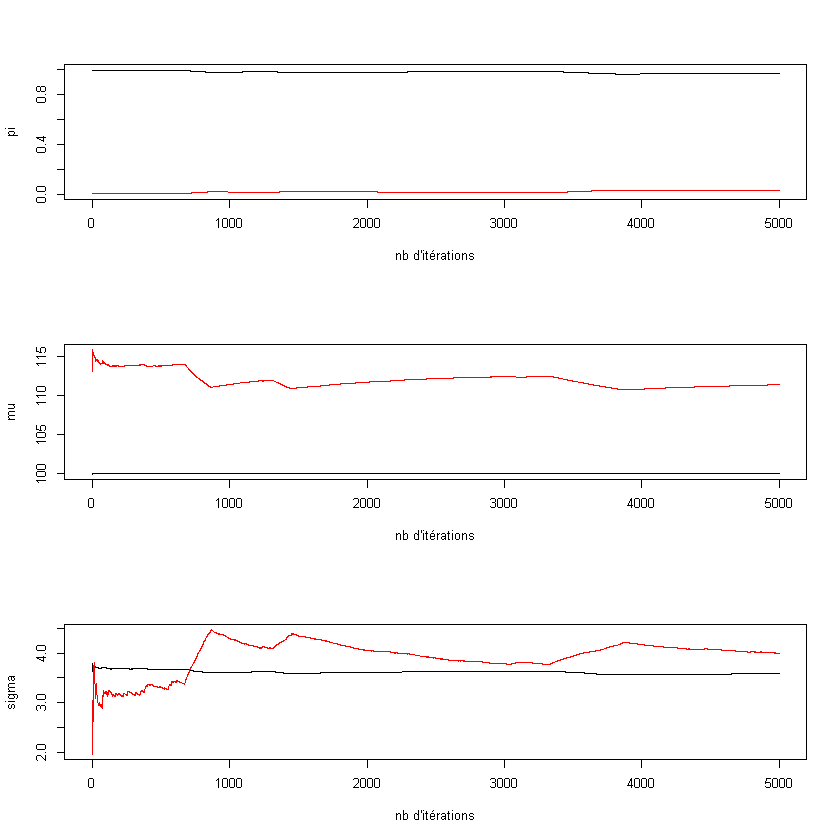

In [51]:
tracer.estim(gibbs.chlor)

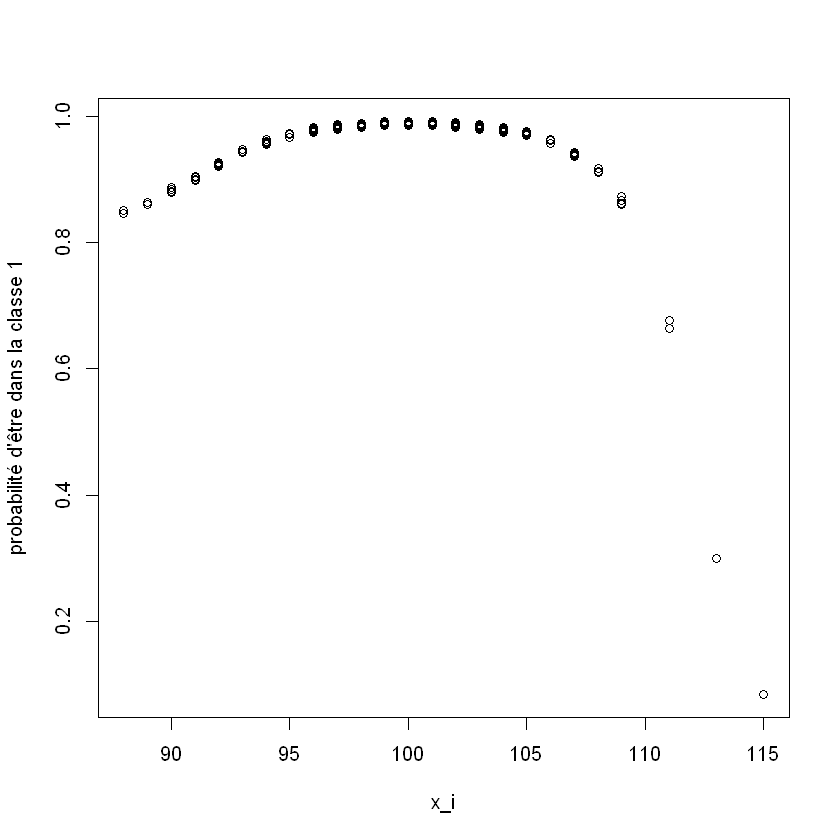

In [52]:
class <- class.zi(gibbs.chlor)
plot(chlor,class[,1],xlab='x_i',ylab="probabilité d'être dans la classe 1")